In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

from graphing_function_recent import total_seconds, rotate_trajectory, normalize_rotation, likelihood_check, dataframe_ranges, convert_time, audio_timing, time_set_zero, convert_data, single_mouse_data, displacement, speed, angle, angle_speed, trajectory, head_angle_trajectory_figure, speed_figure, displacement_figure, head_angle_figure, linearity_ratio, angle_speed_figure, escape_time, filter_data

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Hanna\escape_behavior_HannaJachna_2024-07-8\Tested_V2\coords_csv\CoordM1_P2_06192024_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation2_EscapeBehavior_Hanna_06192024\Variation2_EscapeBehavior_Hanna_06192024_timestamp\M1_P2_06192024_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation2_EscapeBehavior_Hanna_06192024\Variation2_EscapeBehavior_Hanna_06192024_audio\M1_P2_06192024_audio.wav'

north_pixel = 21
south_pixel = 456
east_pixel = 568
west_pixel = 98
shelter_x_pixel = 534
shelter_y_pixel = 260

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 717.1989799999943  #stimulus start time
stimulus_end = 724.8039799999943 #stimulus end time
escape_done = 720 #time mouse reaches shelter location


In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.080879,NaN,NaN,0.003175,-30.608431,0.321598,...,0.000075,NaN,NaN,0.000207,19.355531,2.919433,0.000144,18.682581,2.093717,0.012064
1,1,1,NaN,NaN,0.046740,NaN,NaN,0.002972,-30.538135,0.321598,...,0.000062,NaN,NaN,0.000268,19.369600,2.972987,0.000121,18.704674,2.178067,0.006580
2,2,2,NaN,NaN,0.264697,NaN,NaN,0.002346,-30.499643,0.355494,...,0.000058,NaN,NaN,0.000321,19.383748,2.972987,0.000150,18.705716,2.178067,0.018269
3,3,3,NaN,NaN,0.222829,NaN,NaN,0.003457,-30.451746,0.355494,...,0.000062,NaN,NaN,0.000345,19.383748,2.919433,0.000169,18.706326,2.156967,0.017976
4,4,4,NaN,NaN,0.078973,NaN,NaN,0.003251,-30.451746,0.355494,...,0.000069,NaN,NaN,0.000478,19.383748,2.903094,0.000109,18.706326,2.178067,0.008779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222,18222,18222,21.056664,5.216755,0.999813,20.717866,6.944555,0.999992,21.700807,7.093134,...,0.999765,20.269928,9.037685,0.999873,20.095807,10.402911,0.999987,20.159121,11.960889,0.999995
18223,18223,18223,21.068978,5.198648,0.999810,20.721070,6.944555,0.999992,21.700807,7.093134,...,0.999785,20.261594,9.046980,0.999878,20.094591,10.395867,0.999987,20.155544,11.952111,0.999995
18224,18224,18224,21.095844,5.186593,0.999819,20.725462,6.909540,0.999993,21.704206,7.106015,...,0.999871,20.235298,9.101295,0.999890,20.093720,10.395867,0.999990,20.155544,11.952111,0.999997
18225,18225,18225,21.095844,5.177157,0.999880,20.725462,6.896817,0.999991,21.704206,7.093134,...,0.999810,20.204872,9.101295,0.999870,20.093720,10.395867,0.999987,20.155544,11.952111,0.999996


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

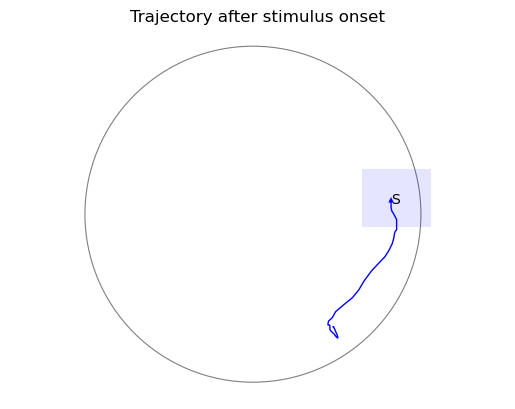

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

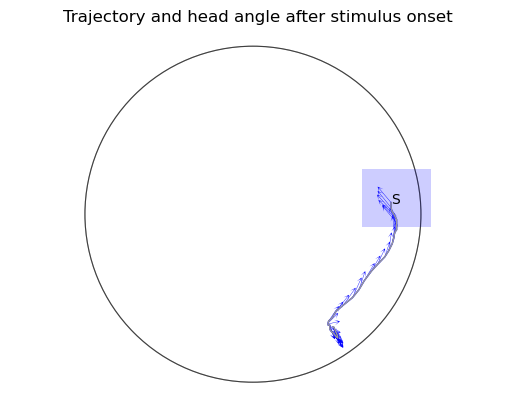

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

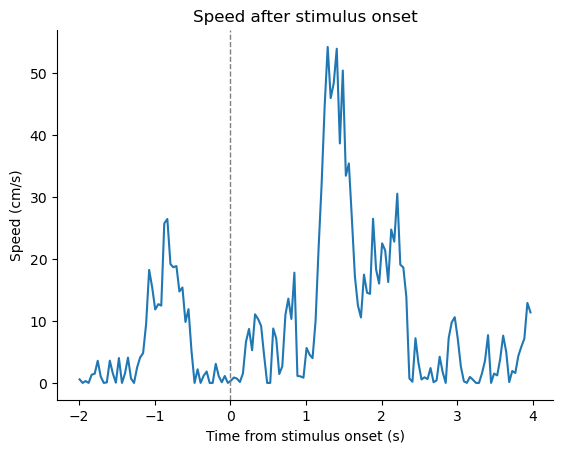

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

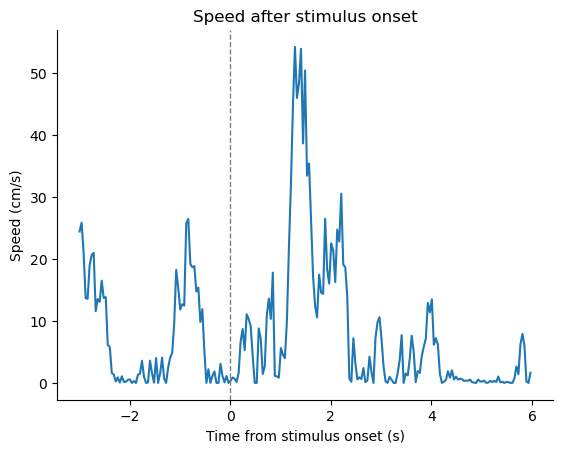

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

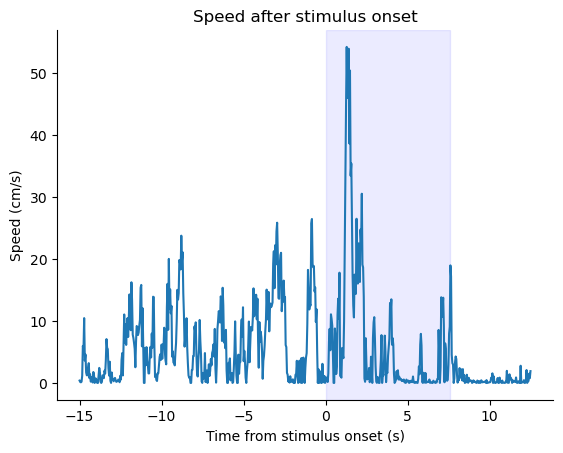

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

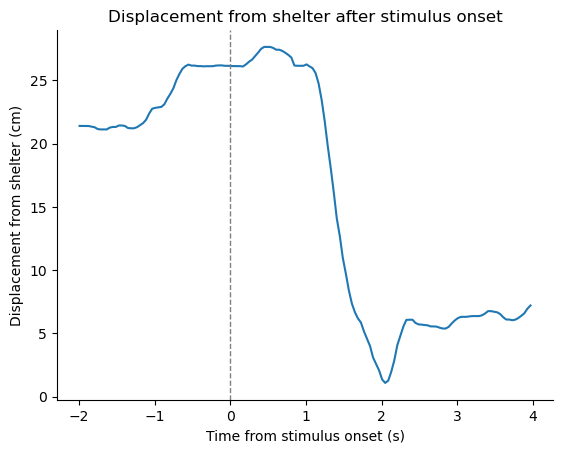

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

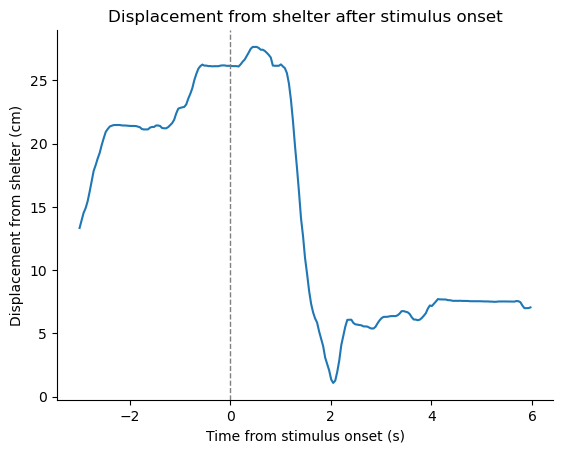

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

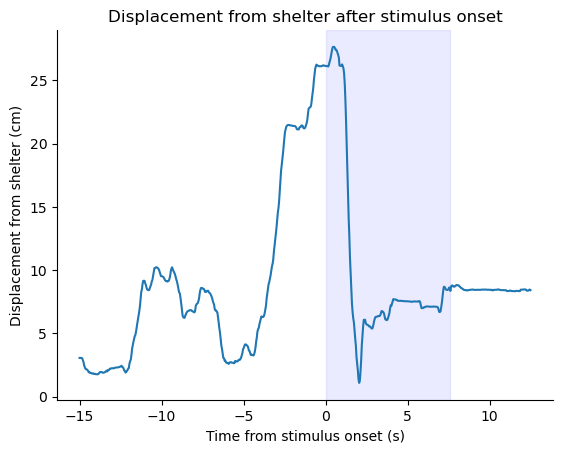

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

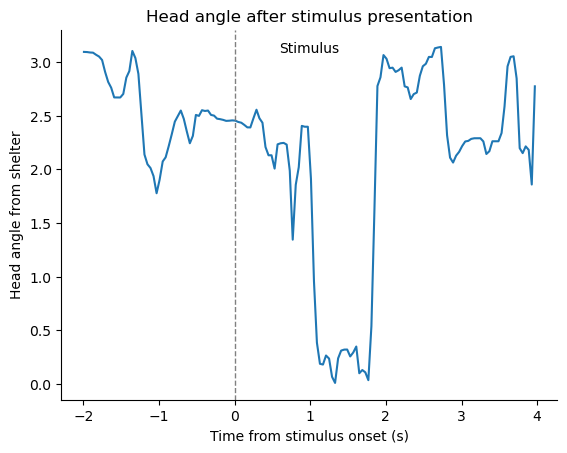

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

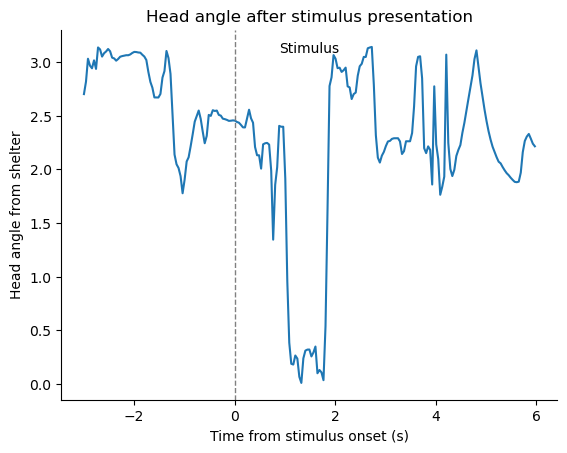

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

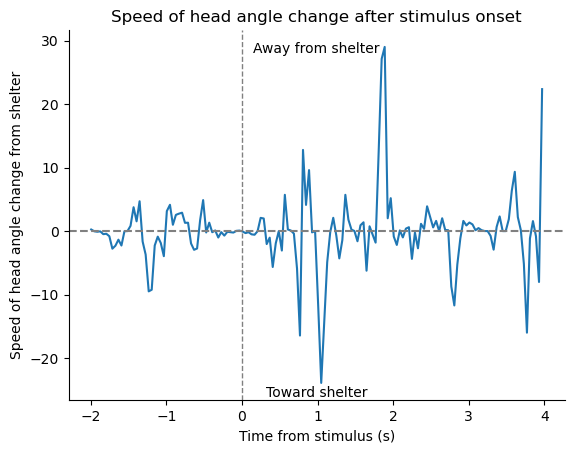

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [29]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
17914,17914,17914,16.738268,-24.245433,0.090990,16.328294,-23.041951,0.999855,17.046750,-22.710463,...,12.062719,-17.327536,1.000000,716.737715,0.008755,26.138841,0.372407,0.015230,2.454912,-0.055864
17915,17915,17915,16.745120,-24.245489,0.090344,16.331308,-23.080566,0.999889,17.046750,-22.710463,...,12.061067,-17.326033,1.000000,716.776793,0.047833,26.129797,0.874601,0.034178,2.442503,-0.317550
17916,17916,17916,16.751972,-24.245545,0.252919,16.331308,-23.087231,0.999939,17.060838,-22.754210,...,12.060572,-17.326033,1.000000,716.816755,0.087795,26.128946,0.703158,0.028100,2.435552,-0.173941
17917,17917,17917,16.758824,-24.245601,0.295455,16.331308,-23.141570,0.999960,17.062276,-22.812271,...,12.045153,-17.326033,1.000000,716.856678,0.127718,26.126278,0.151396,0.006044,2.415140,-0.511266
17918,17918,17918,16.765676,-24.245656,0.824122,16.331308,-23.198297,0.999997,17.166354,-22.929777,...,12.045153,-17.329598,1.000000,716.896678,0.167718,26.099181,1.538372,0.061535,2.392163,-0.574431
17919,17919,17919,16.840282,-24.653601,0.593630,16.424359,-23.677116,0.999997,17.291186,-23.365809,...,12.051755,-17.374930,1.000000,716.936716,0.207756,26.264091,6.634584,0.265635,2.391590,-0.014306
17920,17920,17920,16.914887,-25.061545,0.797730,16.569490,-24.047781,0.999998,17.520821,-23.817540,...,12.051755,-17.465839,1.000000,716.976755,0.247795,26.474569,8.721170,0.349187,2.475039,2.084178
17921,17921,17921,16.989493,-25.469489,0.902156,16.680301,-24.274176,0.999998,17.634947,-24.140167,...,12.312970,-17.569161,1.000000,717.017804,0.288844,26.644957,5.271276,0.216381,2.556513,1.984814
17922,17922,17922,17.333357,-25.775691,0.807630,16.917454,-24.616762,0.999987,17.822871,-24.482910,...,12.626859,-18.038198,0.999997,717.056870,0.327910,26.910594,11.073561,0.432600,2.476618,-2.045147
17923,17923,17923,17.360620,-25.807849,0.117028,17.010192,-24.961096,0.999943,17.950504,-24.759011,...,12.705148,-18.348323,0.999997,717.096780,0.367820,27.193877,10.323218,0.412000,2.435463,-1.031180


In [30]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [31]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
17914,17914,17914,16.738268,-24.245433,0.090990,16.328294,-23.041951,0.999855,17.046750,-22.710463,...,12.062719,-17.327536,1.000000,716.737715,0.008755,26.138841,0.372407,0.015230,2.454912,-0.055864
17915,17915,17915,16.745120,-24.245489,0.090344,16.331308,-23.080566,0.999889,17.046750,-22.710463,...,12.061067,-17.326033,1.000000,716.776793,0.047833,26.129797,0.874601,0.034178,2.442503,-0.317550
17916,17916,17916,16.751972,-24.245545,0.252919,16.331308,-23.087231,0.999939,17.060838,-22.754210,...,12.060572,-17.326033,1.000000,716.816755,0.087795,26.128946,0.703158,0.028100,2.435552,-0.173941
17917,17917,17917,16.758824,-24.245601,0.295455,16.331308,-23.141570,0.999960,17.062276,-22.812271,...,12.045153,-17.326033,1.000000,716.856678,0.127718,26.126278,0.151396,0.006044,2.415140,-0.511266
17918,17918,17918,16.765676,-24.245656,0.824122,16.331308,-23.198297,0.999997,17.166354,-22.929777,...,12.045153,-17.329598,1.000000,716.896678,0.167718,26.099181,1.538372,0.061535,2.392163,-0.574431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18083,18083,18083,20.503407,11.800274,0.018392,24.732889,10.851237,0.999862,23.952320,11.568687,...,20.368005,6.470962,0.999998,723.498419,6.769459,7.103289,0.075467,0.003004,1.962666,-0.196703
18084,18084,18084,20.409117,11.787202,0.016265,24.724658,10.870619,0.999838,23.949072,11.593941,...,20.368005,6.461928,0.999999,723.538624,6.809664,7.081414,0.627657,0.025235,1.951820,-0.269758
18085,18085,18085,20.314828,11.774129,0.013971,24.600725,10.994373,0.999701,23.798142,11.593941,...,20.370049,6.453322,0.999998,723.578560,6.849600,7.055801,0.645517,0.025779,1.934944,-0.422562
18086,18086,18086,20.220538,11.761056,0.157798,23.757821,11.306548,0.999473,22.940294,11.593941,...,20.611138,6.292568,0.999999,723.618572,6.889612,6.856709,8.550406,0.342119,1.972464,0.937697


In [32]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

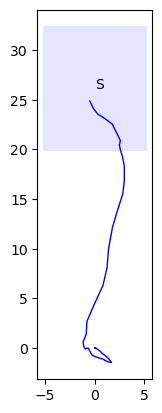

In [33]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


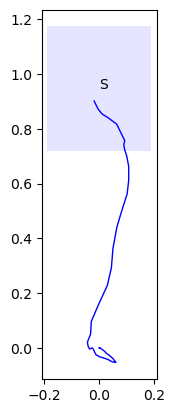

In [34]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

